Postal Code to Polygon Finder

Used postal code input: 76829
Polygon Data retrieved: {'_id': ObjectId('65be3e78c4cb36f967a5d5f5'), 'postal_code': '76829', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[7.9752133, 49.1732858], [7.974761, 49.1737483], [7.9745777, 49.1750368], [7.9750703, 49.1755712], [7.9752567, 49.1758731], [7.9751837, 49.1762651], [7.9747462, 49.1765776], [7.9743168, 49.1769113], [7.9742033, 49.1777111], [7.9739279, 49.1780342], [7.973936, 49.1782884], [7.9744075, 49.1786428], [7.9752585, 49.1791243], [7.9762231, 49.1794266], [7.9773337, 49.1799487], [7.9777295, 49.180671], [7.977611, 49.1815022], [7.9778055, 49.1817459], [7.9780068, 49.1819241], [7.9790671, 49.1821559], [7.9832575, 49.1830718], [7.9825283, 49.1838556], [7.9845721, 49.1850394], [7.9839519, 49.1866009], [7.9839894, 49.1868261], [7.9842094, 49.1873258], [7.9838827, 49.1896304], [7.9838151, 49.1898817], [7.983689, 49.1901192], [7.9835093, 49.1903059], [7.9829072, 49.1908365], [7.9815191, 49.1914435], [7.9803872, 49.1920816], [

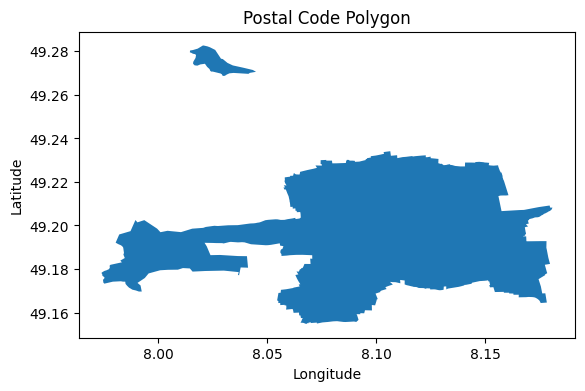

In [1]:
import osmnx as ox
import geopandas as gpd
from pymongo import MongoClient
from shapely.geometry import Polygon, MultiPolygon, Point
import matplotlib.pyplot as plt
import json

# Set the default CRS to EPSG:25832
ox.settings.default_crs = "epsg:25832"

def connect_to_mongodb(config):
    """
    Connects to MongoDB using the configuration parameters.
    """
    client = MongoClient(config['host'], config['port'])
    db = client[config['database_name']]
    collection = db[config['collection_name']]
    return client, collection

def get_polygon_from_result(result):
    """
    Retrieves Shapely Polygon or MultiPolygon from MongoDB result.
    """
    # Check if there is no result for the given postal code
    if result is None:
        raise UserWarning("No geometry for the given postal code")

    # Check if the geometry type is a Polygon
    elif result["geometry"]["type"] == "Polygon":
        # Create a Shapely Polygon object using the exterior coordinates of the polygon
        shapely_geometry = Polygon(result["geometry"]["coordinates"][0])

    # Check if the geometry type is a MultiPolygon
    elif result["geometry"]["type"] == "MultiPolygon":
        # Create a list of Shapely Polygons using the coordinates of the individual polygons
        polygons = [Polygon(poly_coords[0]) for poly_coords in result["geometry"]["coordinates"]]
        # Create a Shapely MultiPolygon object from the list of Polygons
        shapely_geometry = MultiPolygon(polygons)

    # Handle other geometry types if needed
    else:
        raise UserWarning("Unsupported geometry type")

    return shapely_geometry

def retrieve_polygon_by_postal_code(collection, postal_code):
    """
    Retrieves the polygon for a given postal code from MongoDB using a geospatial query.
    """
    document = collection.find_one({"postal_code": postal_code})

    if document:
        shapely_geometry = get_polygon_from_result(document)
        return shapely_geometry, document
    else:
        print(f"No polygon found for postal code: {postal_code}")
        return None, None

def plot_polygon(polygon):
    """
    Plots the given polygon.
    """
    if polygon:
        gdf = gpd.GeoDataFrame(geometry=[polygon])
        gdf.plot()
        plt.title("Postal Code Polygon")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

def query_and_plot_polygon(config):
    # Connect to MongoDB
    mongo_client, mongo_collection = connect_to_mongodb(config)

    # Input the postal code you want to query
    input_postal_code = input("Enter a postal code: ")

    # Retrieve the polygon and data for the specified postal code
    selected_polygon, selected_polygon_data = retrieve_polygon_by_postal_code(mongo_collection, input_postal_code)

    # Print the used postal code input
    print(f"Used postal code input: {input_postal_code}")
    print(f"Polygon Data retrieved: {selected_polygon_data}")

    # Plot the retrieved polygon
    plot_polygon(selected_polygon)

    # Close MongoDB connection when done
    mongo_client.close()

# Beispiel-Nutzung
if __name__ == "__main__":
    # Read configuration from the separate config file
    with open('config.json', 'r') as config_file:
        config = json.load(config_file)

    query_and_plot_polygon(config)


Coordinate to nearest Postal Code & Polygon

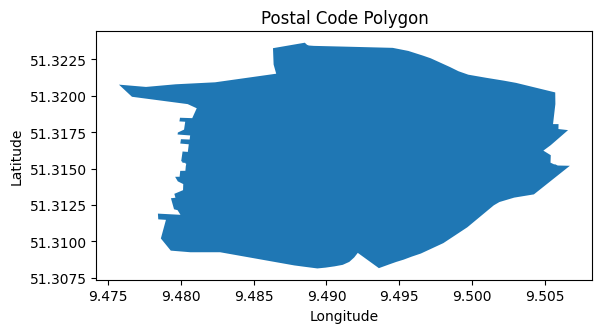

Selected Polygon Information:
POLYGON ((9.4757436 51.3207645, 9.4776032 51.3206073, 9.4796463 51.3207892, 9.4823482 51.320925, 9.4865459 51.3215156, 9.4863685 51.3221459, 9.4863246 51.3232692, 9.4885094 51.323645, 9.4886636 51.3235004, 9.4887893 51.3234516, 9.4891333 51.3234269, 9.491381 51.3233725, 9.4945481 51.3232914, 9.4956217 51.3230797, 9.4966232 51.3227593, 9.4971661 51.3225718, 9.4984949 51.321968, 9.499068 51.3216853, 9.4997424 51.3214482, 9.5009621 51.3212365, 9.5021754 51.3210394, 9.5030204 51.3208864, 9.5057135 51.3202296, 9.5057238 51.3194333, 9.5055623 51.3180545, 9.5059413 51.3180525, 9.5059333 51.3177153, 9.506594 51.3176393, 9.5054007 51.3166035, 9.5048986 51.3162318, 9.5054078 51.3159155, 9.5053889 51.3154057, 9.5056556 51.3152783, 9.505686 51.3153018, 9.5058858 51.3152088, 9.5067184 51.3151902, 9.5042477 51.3132263, 9.5028925 51.3130033, 9.5018798 51.312701, 9.5014944 51.3124757, 9.4996728 51.3109643, 9.4980295 51.3098796, 9.4964866 51.3091642, 9.4958408 51.3089457, 

In [2]:
import osmnx as ox
import geopandas as gpd
from pymongo import MongoClient
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import json
from bson import ObjectId

class JSONEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, ObjectId):
            return str(o)
        return super().default(o)

# Set the default CRS to EPSG:25832
ox.settings.default_crs = "epsg:25832"

def read_config_file(config_path):
    """
    Reads the configuration from the specified JSON file.
    """
    with open(config_path, 'r') as config_file:
        config = json.load(config_file)
    return config

def connect_to_mongodb(config):
    """
    Connects to MongoDB using the configuration and returns the MongoDB client and collection.
    """
    client = MongoClient(config["host"], config["port"])
    db = client[config["database_name"]]
    collection = db[config["collection_name"]]
    return client, collection

def retrieve_data_from_mongodb(collection, point):
    """
    Retrieves GeoJSON data from MongoDB collection using a geospatial query based on the specified point.
    """
    query = {
        "geometry": {
            "$geoIntersects": {
                "$geometry": {
                    "type": "Point",
                    "coordinates": [point.x, point.y]
                }
            }
        }
    }

    cursor = collection.find(query)
    geojson_data = {"type": "FeatureCollection", "features": list(cursor)}

    return geojson_data

def get_polygon_from_result(result):
    """
    Retrieves Shapely Polygon or MultiPolygon from MongoDB result.
    """
    # Check if there is no result for the given point
    if not result['features']:
        raise UserWarning("No geometry for the given point")

    # Access the GeoJSON geometry directly
    geojson_geometry = result['features'][0].get('geometry')

    # Check if coordinates are nested (indicating a polygon with holes)
    coordinates = geojson_geometry['coordinates'][0]

    if isinstance(coordinates[0][0], list):
        # Create a MultiPolygon
        return MultiPolygon([Polygon(part) for part in coordinates])
    else:
        # Create a Polygon
        return Polygon(coordinates)

def plot_polygon(polygon):
    """
    Plots a Shapely Polygon.
    """
    gdf = gpd.GeoDataFrame(geometry=[polygon])
    gdf.plot()
    plt.title("Postal Code Polygon")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

if __name__ == "__main__":
    # Read configuration from the specified file
    config_path = "config.json"
    config = read_config_file(config_path)

    # Input latitude and longitude for the point
    latitude = float(51.316669)
    longitude = float(9.500000)

    # Create a Point object for the specified latitude and longitude
    point = Point(longitude, latitude)

    # Connect to MongoDB using the configuration
    mongo_client, mongo_collection = connect_to_mongodb(config)

    # Retrieve GeoJSON data from MongoDB based on the specified point
    geojson_data_from_mongo = retrieve_data_from_mongodb(mongo_collection, point)

    # Plot the retrieved polygon
    if geojson_data_from_mongo['features']:
        selected_polygon = get_polygon_from_result(geojson_data_from_mongo)
        plot_polygon(selected_polygon)

        # Access the selected polygon as needed
        print("Selected Polygon Information:")
        print(selected_polygon)

        # Access any other information in the GeoJSON feature as needed
        first_feature = geojson_data_from_mongo['features'][0]
        
        print(f"Nearest Postal Code: {first_feature.get('postal_code')}")
        # Add more print statements for other properties if needed
    else:
        print(f"No features found in the retrieved GeoJSON data.")

    # Close MongoDB connection when done
    mongo_client.close()


MultiPolygon Finder

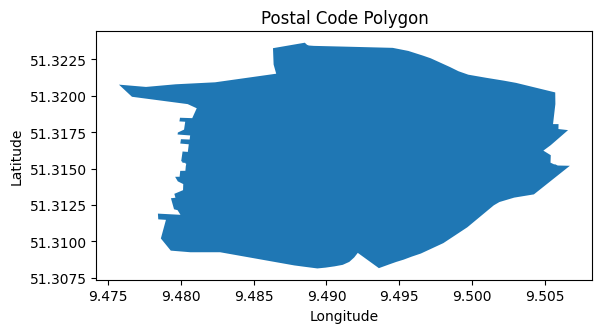

Selected Polygon Information:
POLYGON ((9.4757436 51.3207645, 9.4776032 51.3206073, 9.4796463 51.3207892, 9.4823482 51.320925, 9.4865459 51.3215156, 9.4863685 51.3221459, 9.4863246 51.3232692, 9.4885094 51.323645, 9.4886636 51.3235004, 9.4887893 51.3234516, 9.4891333 51.3234269, 9.491381 51.3233725, 9.4945481 51.3232914, 9.4956217 51.3230797, 9.4966232 51.3227593, 9.4971661 51.3225718, 9.4984949 51.321968, 9.499068 51.3216853, 9.4997424 51.3214482, 9.5009621 51.3212365, 9.5021754 51.3210394, 9.5030204 51.3208864, 9.5057135 51.3202296, 9.5057238 51.3194333, 9.5055623 51.3180545, 9.5059413 51.3180525, 9.5059333 51.3177153, 9.506594 51.3176393, 9.5054007 51.3166035, 9.5048986 51.3162318, 9.5054078 51.3159155, 9.5053889 51.3154057, 9.5056556 51.3152783, 9.505686 51.3153018, 9.5058858 51.3152088, 9.5067184 51.3151902, 9.5042477 51.3132263, 9.5028925 51.3130033, 9.5018798 51.312701, 9.5014944 51.3124757, 9.4996728 51.3109643, 9.4980295 51.3098796, 9.4964866 51.3091642, 9.4958408 51.3089457, 

In [3]:
import osmnx as ox
import geopandas as gpd
from pymongo import MongoClient
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import json
from bson import ObjectId

class JSONEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, ObjectId):
            return str(o)
        return super().default(o)

# Set the default CRS to EPSG:25832
ox.settings.default_crs = "epsg:25832"

def read_config_file(config_path):
    """
    Reads the configuration from the specified JSON file.
    """
    with open(config_path, 'r') as config_file:
        config = json.load(config_file)
    return config

def connect_to_mongodb(config):
    """
    Connects to MongoDB using the configuration and returns the MongoDB client and collection.
    """
    client = MongoClient(config["host"], config["port"])
    db = client[config["database_name"]]
    collection = db[config["collection_name"]]
    return client, collection

def retrieve_data_from_mongodb(collection, point):
    """
    Retrieves GeoJSON data from MongoDB collection using a geospatial query based on the specified point.
    """
    query = {
        "geometry": {
            "$geoIntersects": {
                "$geometry": {
                    "type": "Point",
                    "coordinates": [point.x, point.y]
                }
            }
        }
    }

    cursor = collection.find(query)
    geojson_data = {"type": "FeatureCollection", "features": list(cursor)}

    return geojson_data

def get_polygon_from_result(result):
    """
    Retrieves Shapely Polygon or MultiPolygon from MongoDB result.
    """
    # Check if there is no result for the given point
    if not result['features']:
        raise UserWarning("No geometry for the given point")

    # Access the GeoJSON geometry directly
    geojson_geometry = result['features'][0].get('geometry')

    # Check if coordinates are nested (indicating a polygon with holes)
    coordinates = geojson_geometry['coordinates'][0]

    if isinstance(coordinates[0][0], list):
        # Create a MultiPolygon
        return MultiPolygon([Polygon(part) for part in coordinates])
    else:
        # Create a Polygon
        return Polygon(coordinates)

def plot_polygon(polygon):
    """
    Plots a Shapely Polygon.
    """
    gdf = gpd.GeoDataFrame(geometry=[polygon])
    gdf.plot()
    plt.title("Postal Code Polygon")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

if __name__ == "__main__":
    # Read configuration from the specified file
    config_path = "config.json"
    config = read_config_file(config_path)

    # Input latitude and longitude for the point
    latitude = float(51.316669)
    longitude = float(9.500000)

    # Create a Point object for the specified latitude and longitude
    point = Point(longitude, latitude)

    # Connect to MongoDB using the configuration
    mongo_client, mongo_collection = connect_to_mongodb(config)

    # Retrieve GeoJSON data from MongoDB based on the specified point
    geojson_data_from_mongo = retrieve_data_from_mongodb(mongo_collection, point)

    # Plot the retrieved polygon
    if geojson_data_from_mongo['features']:
        selected_polygon = get_polygon_from_result(geojson_data_from_mongo)
        plot_polygon(selected_polygon)

        # Access the selected polygon as needed
        print("Selected Polygon Information:")
        print(selected_polygon)

        # Access any other information in the GeoJSON feature as needed
        first_feature = geojson_data_from_mongo['features'][0]
        
        print(f"Nearest Postal Code: {first_feature.get('postal_code')}")
        # Add more print statements for other properties if needed
    else:
        print(f"No features found in the retrieved GeoJSON data.")

    # Close MongoDB connection when done
    mongo_client.close()
